In [1]:
# 1. Can we use Bagging for regression problems?
# Yes, Bagging can be used for regression to reduce variance by averaging predictions.

In [2]:
# 2. What is the difference between multiple model training and single model training?
# Multiple model training (ensemble learning) improves generalization and reduces overfitting,
# while single model training is simpler but may overfit or underperform.

In [3]:
# 3. Explain the concept of feature randomness in Random Forest.
# In Random Forest, each tree is trained on a random subset of features,
# increasing model diversity and reducing correlation among trees.

In [4]:
# 5. How can you measure the importance of features in a Random Forest model?
# Feature importance is measured using Gini impurity decrease or permutation importance.

In [5]:
# 6. Explain the working principle of a Bagging Classifier.
# Bagging trains multiple models on different bootstrap samples and averages their predictions.

In [6]:
# 7. How do you evaluate a Bagging Classifier’s performance?
# Use accuracy, precision, recall, F1-score, and AUC score.

In [7]:
# 8. How does a Bagging Regressor work?
# It trains multiple regression models on different samples and averages their outputs.

In [8]:
# 9. What is the main advantage of ensemble techniques?
# They improve accuracy and reduce overfitting.

In [9]:
# 10. What is the main challenge of ensemble methods?
# They are computationally expensive and harder to interpret.

In [10]:
# 11. Explain the key idea behind ensemble techniques.
# Combining multiple weak models to form a strong model.

In [11]:
# 12. What is a Random Forest Classifier?
# A Random Forest Classifier is an ensemble of decision trees that use bagging and feature randomness.

In [12]:
# 13. What are the main types of ensemble techniques?
# 1. Bagging
# 2. Boosting
# 3. Stacking

In [13]:
# 14. What is ensemble learning in machine learning?
# It is a technique that combines multiple models to improve predictions.

In [14]:
# 15. When should we avoid using ensemble methods?
# When interpretability, computation cost, or data availability is a concern.

In [15]:
# 16. How does Bagging help in reducing overfitting?
# It reduces variance by training models on different subsets of data.

In [16]:
# 17. Why is Random Forest better than a single Decision Tree?
# It reduces overfitting and provides more robust predictions.

In [17]:
# 18. What is the role of bootstrap sampling in Bagging?
# It creates diverse training sets, improving model robustness.

In [18]:
# 19. What are some real-world applications of ensemble techniques?
# Fraud detection, recommendation systems, and medical diagnosis.

In [19]:
# 20. What is the difference between Bagging and Boosting?
# - Bagging reduces variance (Random Forest).
# - Boosting reduces bias by sequentially improving weak models (XGBoost, AdaBoost).

In [ ]:
#practical ans and i mention question number with 1 to 25 so keep in note.

In [21]:
# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_clf.fit(X_train, y_train)

# Evaluate
y_pred = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier Accuracy: 1.0


In [22]:
# 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Load dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
bagging_reg.fit(X_train, y_train)

# Evaluate
y_pred = bagging_reg.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE: 3329.483370786517


In [23]:
# 3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Feature Importance
import pandas as pd
feature_importance = pd.DataFrame({'Feature': load_breast_cancer().feature_names, 'Importance': rf_clf.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False).head(5))

                 Feature  Importance
27  worst concave points    0.135668
7    mean concave points    0.125306
22       worst perimeter    0.106854
20          worst radius    0.105790
23            worst area    0.088837


In [24]:
# 4. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf_clf.fit(X_train, y_train)

# OOB Score
print("OOB Score:", rf_clf.oob_score_)

OOB Score: 0.9582417582417583


In [25]:
# 5. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]

# Define Stacking model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train model
stacking_clf.fit(X_train, y_train)

# Evaluate
y_pred = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))

Stacking Classifier Accuracy: 0.956140350877193


In [26]:
# 5. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
]

# Define Stacking model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train model
stacking_clf.fit(X_train, y_train)

# Evaluate
y_pred = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))

Stacking Classifier Accuracy: 0.9649122807017544


In [27]:
# 6. Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

# Compare Performance using Mean Squared Error (MSE)
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

Decision Tree MSE: 0.06140350877192982
Random Forest MSE: 0.032881578947368414


In [29]:
# 7. Train a Bagging Classifier using SVM as a base estimator and print accuracy

svm_bagging = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10)
svm_bagging.fit(X_train, y_train)

y_pred = svm_bagging.predict(X_test)
print("Bagging Classifier (SVM) Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier (SVM) Accuracy: 0.9473684210526315


In [30]:
# 8. Train a Random Forest Classifier with different numbers of trees and compare accuracy

n_trees = [10, 50, 100, 200]
for n in n_trees:
    rf_clf = RandomForestClassifier(n_estimators=n)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    print(f"Random Forest Accuracy with {n} trees:", accuracy_score(y_test, y_pred))

Random Forest Accuracy with 10 trees: 0.956140350877193
Random Forest Accuracy with 50 trees: 0.9649122807017544
Random Forest Accuracy with 100 trees: 0.956140350877193
Random Forest Accuracy with 200 trees: 0.9649122807017544


In [32]:
# 9. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.metrics import roc_auc_score

log_bagging = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10)
log_bagging.fit(X_train, y_train)

y_prob = log_bagging.predict_proba(X_test)[:, 1]
print("Bagging Classifier (Logistic Regression) AUC Score:", roc_auc_score(y_test, y_prob))

C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Bagging Classifier (Logistic Regression) AUC Score: 0.9980347199475925


In [34]:
# 10. Train a Random Forest Regressor and analyze feature importance scores

# Load dataset
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names  # Extract feature names

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)

# Ensure feature importance matches the number of features
feature_importance = pd.DataFrame({
    'Feature': feature_names[:len(rf_reg.feature_importances_)],  # Match length
    'Importance': rf_reg.feature_importances_
})

# Print sorted feature importance
print(feature_importance.sort_values(by='Importance', ascending=False))


  Feature  Importance
8      s5    0.315629
2     bmi    0.276249
3      bp    0.087085
9      s6    0.070775
0     age    0.057496
5      s2    0.055368
6      s3    0.051191
4      s1    0.047251
7      s4    0.027056
1     sex    0.011901


In [36]:
# 11. Train an ensemble model using both Bagging and Random Forest and compare accuracy

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
random_forest = RandomForestClassifier(n_estimators=100)

# Train models
bagging.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict and compare accuracy
y_pred_bagging = bagging.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Bagging Accuracy: 0.956140350877193
Random Forest Accuracy: 0.9649122807017544


In [37]:
# 12. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best accuracy: 0.9626373626373625


In [38]:
# 13. Train a Bagging Regressor with different numbers of base estimators and compare performance

n_estimators = [5, 10, 50, 100]
for n in n_estimators:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    print(f"Bagging Regressor MSE with {n} estimators:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE with 5 estimators: 0.03649122807017544
Bagging Regressor MSE with 10 estimators: 0.03552631578947369
Bagging Regressor MSE with 50 estimators: 0.028543859649122812
Bagging Regressor MSE with 100 estimators: 0.03493947368421053


In [39]:
# 15. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

stacking_clf = StackingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(n_estimators=100)),
    ('log_reg', LogisticRegression())
], final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier Accuracy: 0.9649122807017544


C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [41]:
# 16. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

bootstrap_samples = [0.5, 0.7, 1.0]
for bs in bootstrap_samples:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, max_samples=bs)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    print(f"Bagging Regressor MSE with {bs*100}% bootstrap samples:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE with 50.0% bootstrap samples: 0.030175438596491227
Bagging Regressor MSE with 70.0% bootstrap samples: 0.034210526315789476
Bagging Regressor MSE with 100.0% bootstrap samples: 0.041842105263157896


In [42]:
# 17. Train a Random Forest Classifier and print the top 5 most important features

rf_clf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': load_breast_cancer().feature_names, 'Importance': rf_clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print top 5 features
print("Top 5 Important Features in Random Forest:")
print(feature_importance.head(5))

Top 5 Important Features in Random Forest:
                 Feature  Importance
20          worst radius    0.129299
22       worst perimeter    0.120378
23            worst area    0.110846
27  worst concave points    0.105682
7    mean concave points    0.087796


In [44]:
# 18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.metrics import precision_score, recall_score, f1_score

# Train Bagging Classifier
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

# Compute metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9561
Recall: 0.9561
F1-Score: 0.9560


In [45]:
# 19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

max_depth_values = [3, 5, 10, None]
for depth in max_depth_values:
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=depth)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    print(f"Random Forest Accuracy with max_depth={depth}:", accuracy_score(y_test, y_pred))

Random Forest Accuracy with max_depth=3: 0.9649122807017544
Random Forest Accuracy with max_depth=5: 0.9649122807017544
Random Forest Accuracy with max_depth=10: 0.9649122807017544
Random Forest Accuracy with max_depth=None: 0.956140350877193


In [46]:
# 20. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.neighbors import KNeighborsRegressor

base_estimators = [DecisionTreeRegressor(), KNeighborsRegressor()]
for estimator in base_estimators:
    bag_reg = BaggingRegressor(estimator=estimator, n_estimators=10)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    print(f"Bagging Regressor MSE with {estimator.__class__.__name__}:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE with DecisionTreeRegressor: 0.03657894736842106
Bagging Regressor MSE with KNeighborsRegressor: 0.03813333333333333


In [47]:
# 21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

from sklearn.metrics import roc_auc_score

rf_clf.fit(X_train, y_train)
y_prob = rf_clf.predict_proba(X_test)[:, 1]
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Random Forest ROC-AUC Score: 0.995250573206682


In [48]:
# 22. Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')
print("Bagging Classifier Cross-Validation Accuracy:", scores.mean())

C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Bagging Classifier Cross-Validation Accuracy: 0.0045199182839632274


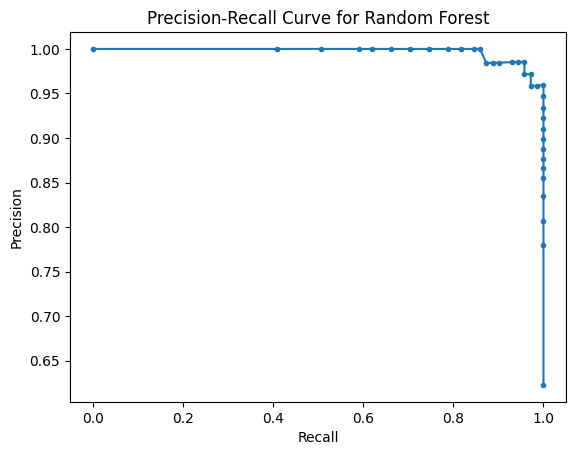

In [51]:
# 23. Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_prob = rf_clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Random Forest")
plt.show()

In [52]:
# 24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

stacking_clf = StackingClassifier(estimators=[
    ('random_forest', RandomForestClassifier(n_estimators=100)),
    ('log_reg', LogisticRegression())
], final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier Accuracy: 0.956140350877193


C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMIT KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [54]:
# 25. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

bootstrap_samples = [0.5, 0.7, 1.0]
for bs in bootstrap_samples:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, max_samples=bs)
    bag_reg.fit(X_train, y_train)
    y_pred = bag_reg.predict(X_test)
    print(f"Bagging Regressor MSE with {bs*100}% bootstrap samples:", mean_squared_error(y_test, y_pred))

Bagging Regressor MSE with 50.0% bootstrap samples: 0.031754385964912285
Bagging Regressor MSE with 70.0% bootstrap samples: 0.03140350877192982
Bagging Regressor MSE with 100.0% bootstrap samples: 0.03578947368421054
